# Problem 3 - Competitive Landscape Analysis

from the voice of the customer. The goal is to identify which competing

In [2]:
#Libraries
import pandas as pd
import re
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
print("Step 1: Libraries imported successfully.")

Step 1: Libraries imported successfully.


In [3]:
try:
    df = pd.read_csv('FitBitReviews_updated.csv')
    # Ensure the review description is a string to prevent errors
    df['review_description'] = df['review_description'].astype(str)
    print("Step 2: Dataset loaded successfully.")
    print(f"Loaded {len(df)} reviews.")
except FileNotFoundError:
    print("Error: 'FitBitReviews_updated.csv' not found. Please ensure the file is in the correct directory.")

Step 2: Dataset loaded successfully.
Loaded 333353 reviews.


In [4]:
# Step 3: Define Competitors and the Search Function 
# Define a comprehensive list of competitors and their common variations
competitors_list = {
    'Apple Watch': ['apple watch', 'iwatch'],
    'Garmin': ['garmin'],
    'Samsung': ['samsung', 'galaxy watch'],
    'Xiaomi': ['xiaomi', 'mi band'],
    'Amazfit': ['amazfit'],
    'Huawei': ['huawei'],
    'MyFitnessPal': ['myfitnesspal', 'my fitness pal'] # App competitor
}

def find_competitors_in_text(text):
    """Scans text for mentions of competitors and returns a list of brands found."""
    found_competitors = set()
    text_lower = text.lower() # Convert text to lowercase for case-insensitive matching
    for brand, keywords in competitors_list.items():
        for keyword in keywords:
            if keyword in text_lower:
                found_competitors.add(brand)
    return list(found_competitors)

print("Step 3: Competitor list and search function defined successfully.")

Step 3: Competitor list and search function defined successfully.


In [5]:
# Step 4: Find Competitor Mentions in the Data ---

# Apply the function to the 'review_description' column
df['competitors_mentioned'] = df['review_description'].apply(find_competitors_in_text)

# Create a new DataFrame containing only reviews that mention at least one competitor
competitor_df = df[df['competitors_mentioned'].map(len) > 0].copy()

print("Step 4: Competitor search complete.")
print(f"Found {len(competitor_df)} reviews that mention a competitor.")

Step 4: Competitor search complete.
Found 10567 reviews that mention a competitor.


In [6]:
#Step 5: Quantitative Analysis - Count the Mentions ---

# Flatten the list of lists into a single list of all mentions
all_mentions = [brand for sublist in competitor_df['competitors_mentioned'] for brand in sublist]

# Count the frequency of each competitor
mention_counts = Counter(all_mentions)

print("Step 5: Top Competitor Mentions (by frequency):")
for brand, count in mention_counts.most_common(10):
    print(f"- {brand}: {count} mentions")

Step 5: Top Competitor Mentions (by frequency):
- Samsung: 6202 mentions
- MyFitnessPal: 1505 mentions
- Garmin: 1466 mentions
- Huawei: 981 mentions
- Apple Watch: 508 mentions
- Xiaomi: 186 mentions
- Amazfit: 21 mentions


C:\Users\Admin\AppData\Local\Temp\ipykernel_10908\2916816629.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mentions', y='Competitor', data=counts_df, palette='viridis')


Step 6: Competitor mentions chart saved to 'competitor_mentions_chart.png'


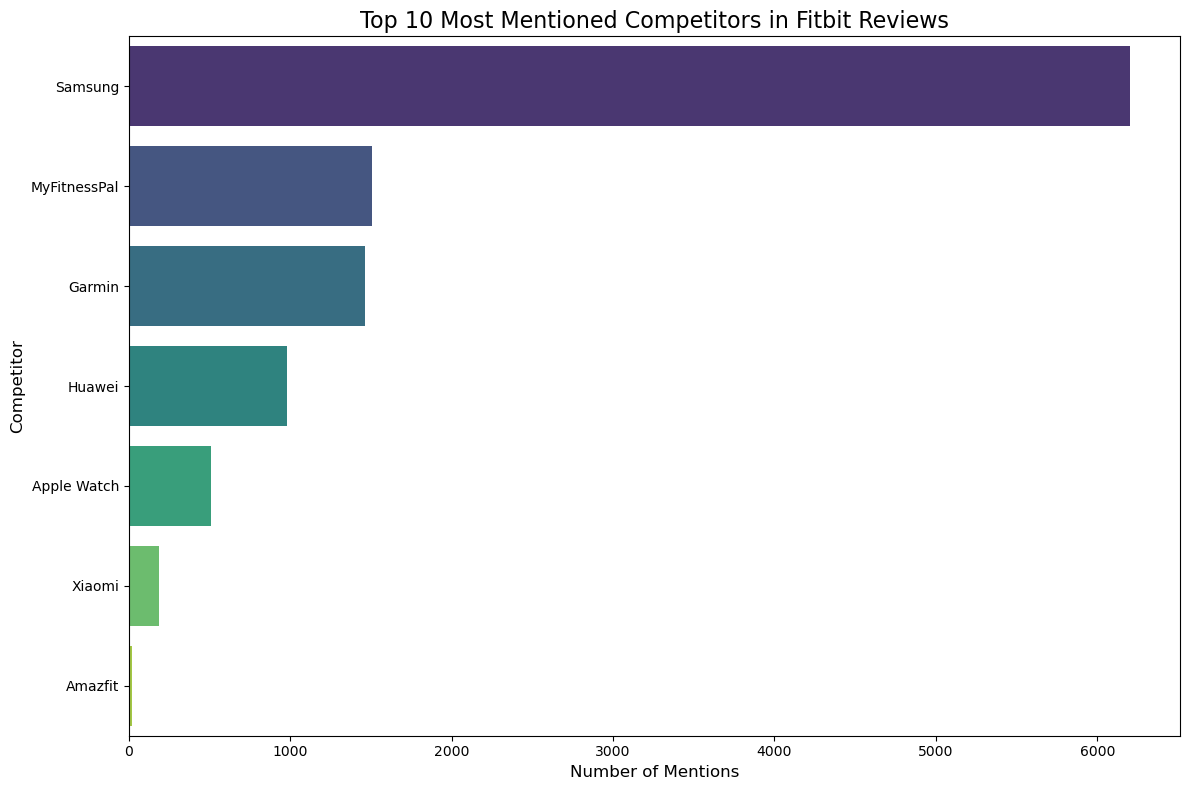

In [7]:
# --- Step 6: Visualize the Quantitative Results ---
# Convert the counts to a DataFrame for easy plotting
counts_df = pd.DataFrame(mention_counts.most_common(10), columns=['Competitor', 'Mentions'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Mentions', y='Competitor', data=counts_df, palette='viridis')
plt.title('Top 10 Most Mentioned Competitors in Fitbit Reviews', fontsize=16)
plt.xlabel('Number of Mentions', fontsize=12)
plt.ylabel('Competitor', fontsize=12)
plt.tight_layout() # Adjust layout to make sure labels fit
#Save the chart to a file
plt.savefig('competitor_mentions_chart.png')
print("Step 6: Competitor mentions chart saved to 'competitor_mentions_chart.png'")

In [15]:
#Step 7: Contextual Analysis - Analyze Sentiment by Rating ---

# Explode the DataFrame so each row corresponds to one competitor mention
competitor_df_exploded = competitor_df.explode('competitors_mentioned')

# Group by competitor and calculate the mean rating, then sort it
avg_rating_by_competitor = competitor_df_exploded.groupby('competitors_mentioned')['rating'].mean().sort_values(ascending=True)

print("Step 7: Average Rating of Reviews When a Competitor is Mentioned:")
print(avg_rating_by_competitor)


Step 7: Average Rating of Reviews When a Competitor is Mentioned:
competitors_mentioned
Amazfit         1.476190
Xiaomi          1.682796
Huawei          1.703364
Garmin          1.708049
Apple Watch     2.000000
Samsung         2.106579
MyFitnessPal    3.600664
Name: rating, dtype: float64


In [21]:
print("\033[1mAverage Rating of Reviews When a Competitor is Mentioned:\033[0m")
pd.DataFrame(avg_rating_by_competitor.reset_index())

Average Rating of Reviews When a Competitor is Mentioned:


,competitors_mentioned,rating
0,Amazfit,1.476190
1,Xiaomi,1.682796
2,Huawei,1.703364
3,Garmin,1.708049
4,Apple Watch,2.000000
5,Samsung,2.106579
6,MyFitnessPal,3.600664
